# Fashion-MNIST Project

In this project, we classify the fashion-MNIST database, using convolutional neural networks.

## Preparation

We will implement the necessary libraries, modules and databases.

In [27]:
!pip install torch
!pip install torchvision


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\nicol\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\nicol\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Pytorch Modules

In [28]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

torch.manual_seed(42)

### Graphing Modules

In [29]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image

function to graph MNIST.

In [30]:
def data_show(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(
        IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

## Create Dataset Class

In [31]:
IMAGE_SIZE = 16

TR_Resize = transforms.Resize((IMAGE_SIZE, IMAGE_SIZE))
TR_toTensor = transforms.ToTensor()

composed = transforms.Compose([TR_Resize, TR_toTensor])

Create two datasets:

1. Training dataset: train_data
2. Validation dataset: val_data

In [32]:
train_data = dsets.FashionMNIST(
    root='.fashion/data', train=True, transform=composed, download=True)
val_data = dsets.FashionMNIST(
    root='.fashion/data', train=False, transform=composed, download=True)

Each training and test example is assigned to one of the following labels:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

Now, we will graph some samples.

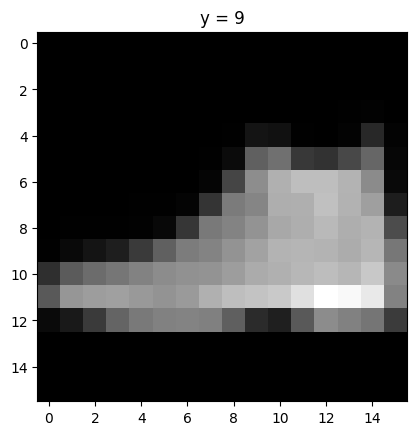

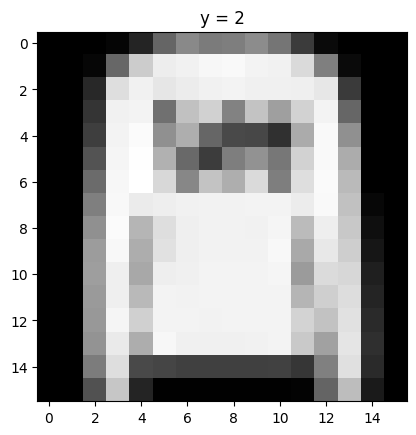

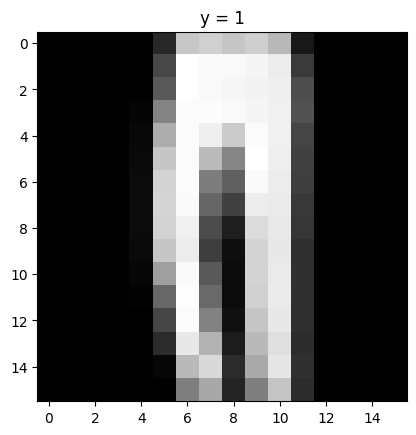

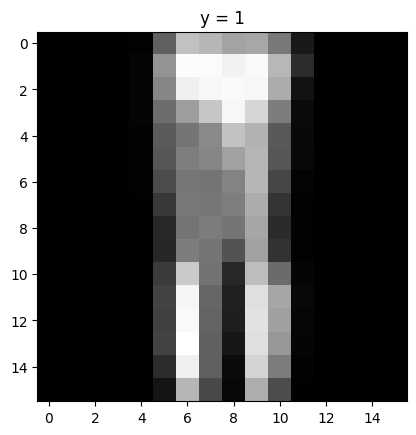

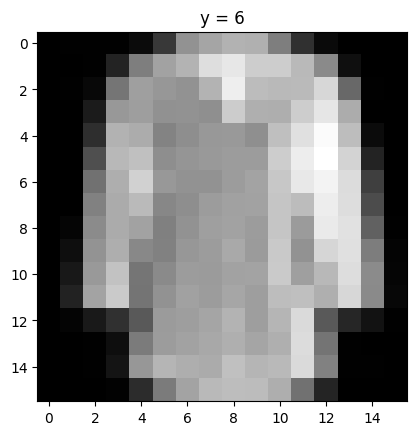

In [33]:
for n, data_sample in enumerate(val_data):
    data_show(data_sample)
    plt.show()

    if n == 4:
        break

# CNN Using Batch Norm

In [34]:
class CNN_batch(nn.Module):

    # Contructor
    def __init__(self, out_1=16, out_2=32, number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(
            in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(
            in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)

    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.bn_fc1(x)
        return x

# Regular CNN

In [35]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

# Train loader and Test loader

In [36]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=100)
test_loader = torch.utils.data.DataLoader(dataset=val_data, batch_size=100)

regular CNN & batch CNN objects.

In [37]:
CNN_O = int(input("Do you want use regular CNN (1) or batch CNN (2): "))

In [38]:
if (CNN_O == 1):
    model = CNN(out_1=16, out_2=2, number_of_classes=10)
else:
    model = CNN_batch(out_1=16, out_2=32, number_of_classes=10)

Create the objects for the criterion and the optimizer named criterion and optimizer. The optimizer use SGD with a learning rate of 0.1 and the criterion use Cross Entropy Loss.

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

## Train Model

In [40]:
import time
start_time = time.time()

cost_list = []
accuracy_list = []
N_test = len(val_data)
n_epochs = 10
for epoch in range(n_epochs):
    cost = 0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost += loss.item()
    correct = 0
    # perform a prediction on the validation  data
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)

end_time = time.time()

In [41]:
print("The performance training was: ", end_time-start_time, " seconds")

The performance training was:  142.55419278144836  seconds


# Plot Cost and Accuracy

Finally, we are goint to plot the Cost and Acurracy function for each epoch for the training and testing data.

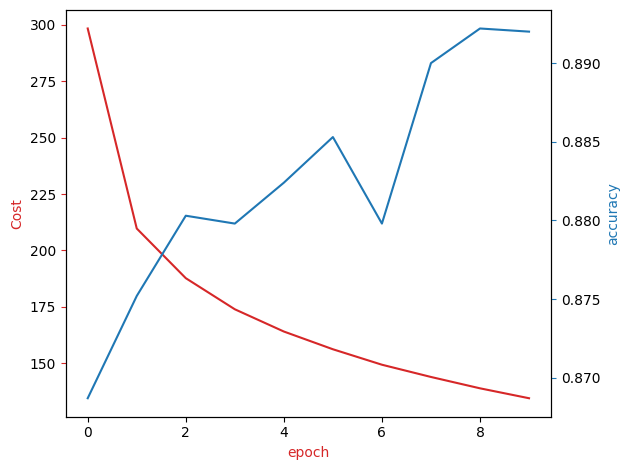

In [42]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.set_xlabel('epoch', color=color)
ax2.plot(accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [43]:
print("Regular Convolutional Neuronal Network." if CNN_O ==
      1 else "Batch Norm Convolutional Neuronal Network.")
print(f"At {n_epochs} epochs and , we obtain a cost of ", cost_list[-1],
      "\nAnd an accuracy of: ", accuracy_list[-1])

Batch Norm Convolutional Neuronal Network.
At 10 epochs and , we obtain a cost of  134.54383189976215 
And an accuracy of:  0.892
